In [9]:
from collections import defaultdict
import heapq
import networkx as nx
import matplotlib.pyplot as plt


def topological_sort(graph):
    visited = set()
    order = []
    def dfs(node):
        if node not in visited:
            visited.add(node)
            for neighbour, _ in graph.get(node, []):
                dfs(neighbour)
            order.append(node)
    for node in graph:
        dfs(node)
    return order[::-1]

def find_top_k_longest_paths(graph, k):
    # Re-identify source and sink nodes after reset
    all_nodes = set(graph.keys())
    successors = set(node for edges in graph.values() for node, _ in edges)
    source_nodes = all_nodes - successors
    sink_nodes = {node for node in graph if not graph[node]}

    if not sink_nodes:  # If no explicit sink nodes, consider all nodes as potential ends
        sink_nodes = all_nodes

    # Initialize paths storage with corrections for source and sink handling
    longest_paths = {node: [] for node in graph}
    for node in source_nodes:
        longest_paths[node].append((0, []))  # Path length and path edges

    topo_order = topological_sort(graph)

    for node in topo_order:
        for successor, weight in graph.get(node, []):
            for path_length, path_edges in longest_paths[node]:
                new_length = path_length + weight
                new_edges = path_edges + [(node, successor)]
                if len(longest_paths[successor]) < k:
                    heapq.heappush(longest_paths[successor], (new_length, new_edges))
                elif longest_paths[successor] and new_length > longest_paths[successor][0][0]:
                    heapq.heapreplace(longest_paths[successor], (new_length, new_edges))

    all_paths = []
    for node in sink_nodes:
        for path_length, path_edges in longest_paths.get(node, []):
            if len(all_paths) < k:
                heapq.heappush(all_paths, (path_length, path_edges))
            elif all_paths and path_length > all_paths[0][0]:
                heapq.heapreplace(all_paths, (path_length, path_edges))

    # Sort the paths by length in descending order and return
    return [(path_length, path_edges) for path_length, path_edges in sorted(all_paths, reverse=True)] if all_paths else []


def display_graph(graph):
    """
    Displays a Directed Acyclic Graph (DAG) using matplotlib.
    
    :param graph: A dictionary representing the adjacency list of the graph,
                  where keys are node identifiers and values are lists of tuples
                  (node, weight) representing directed edges and their weights.
    """
    # Create a directed graph from edges
    G = nx.DiGraph()
    for node, edges in graph.items():
        for edge, weight in edges:
            G.add_edge(node, edge, weight=weight)
    
    # Position nodes using planar layout
    pos = nx.planar_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, 
            edge_color='k', linewidths=2, font_size=15, arrows=True)
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.show()

def convert_graph(graph):

    new_graph = {}
    max_node = max(graph.keys())
    # Iterate through each node and its edges

    for node, edges in graph.items():
        if node not in new_graph:
            new_graph[node] = []
        for edge in edges:
            target, weight = edge
            # If weight > 1, introduce intermediate nodes
            if weight > 1:
                prev_node = node
                for _ in range(weight - 1):
                    max_node += 1
                    new_graph[prev_node].append((max_node, 1))
                    prev_node = max_node
                    if prev_node not in new_graph:
                        new_graph[prev_node] = []
                new_graph[prev_node].append((target, 1))
            else:
                new_graph[node].append(edge)
    # Ensure all nodes are in the new graph
    for node in graph:
        if node not in new_graph:
            new_graph[node] = []
    return new_graph


Original graph:
{0: [(1, 2), (2, 3)], 1: [(3, 6)], 2: [(3, 7)], 3: []}


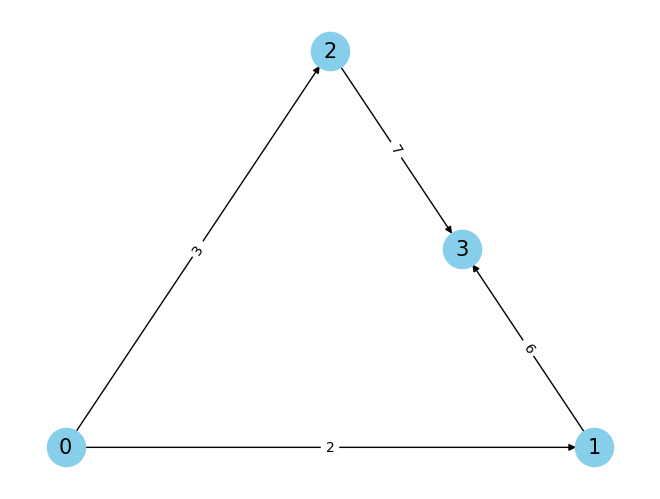

Adjusted graph:
{0: [(4, 1), (5, 1)], 4: [(1, 1)], 5: [(6, 1)], 6: [(2, 1)], 1: [(7, 1)], 7: [(8, 1)], 8: [(9, 1)], 9: [(10, 1)], 10: [(11, 1)], 11: [(3, 1)], 2: [(12, 1)], 12: [(13, 1)], 13: [(14, 1)], 14: [(15, 1)], 15: [(16, 1)], 16: [(17, 1)], 17: [(3, 1)], 3: []}


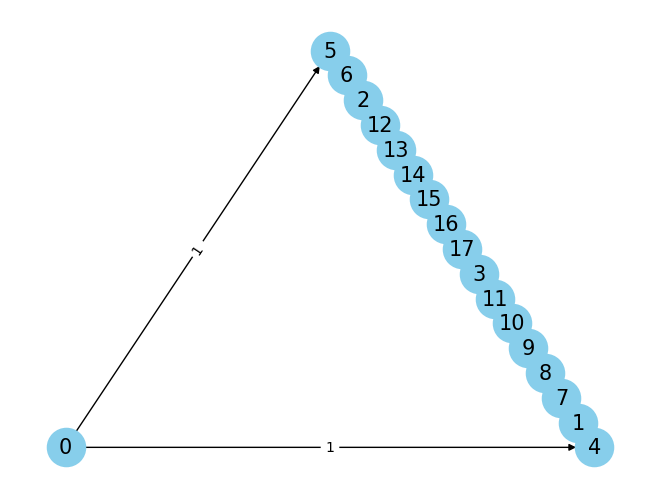

Original graph:
{0: [(1, 1)], 1: [(2, 1)], 2: [(3, 1)], 3: [(4, 1)], 4: []}


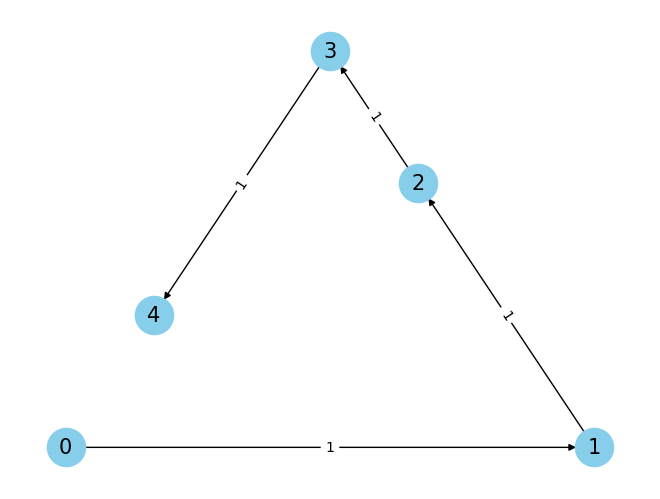

Adjusted graph:
{0: [(1, 1)], 1: [(2, 1)], 2: [(3, 1)], 3: [(4, 1)], 4: []}


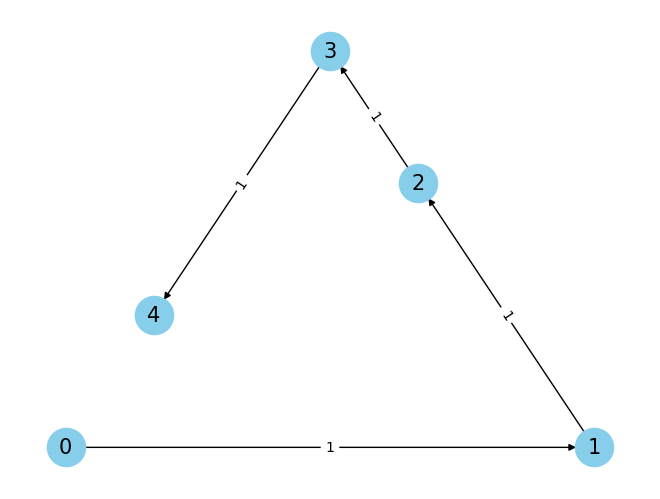

Original graph:
{0: [(1, 5)], 1: [], 2: [(3, 10)], 3: []}


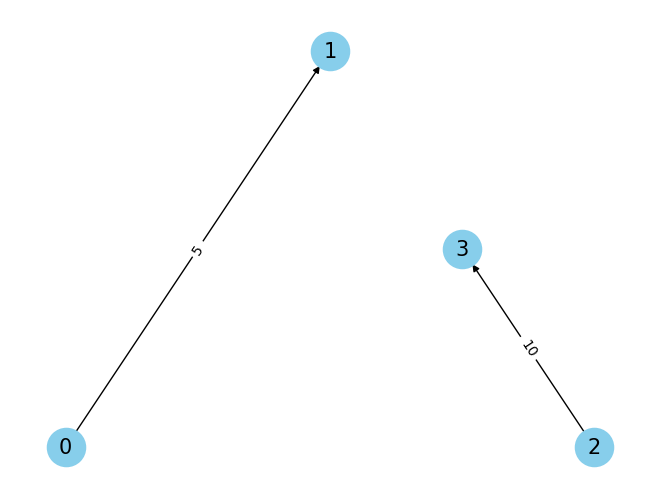

Adjusted graph:
{0: [(4, 1)], 4: [(5, 1)], 5: [(6, 1)], 6: [(7, 1)], 7: [(1, 1)], 1: [], 2: [(8, 1)], 8: [(9, 1)], 9: [(10, 1)], 10: [(11, 1)], 11: [(12, 1)], 12: [(13, 1)], 13: [(14, 1)], 14: [(15, 1)], 15: [(16, 1)], 16: [(3, 1)], 3: []}


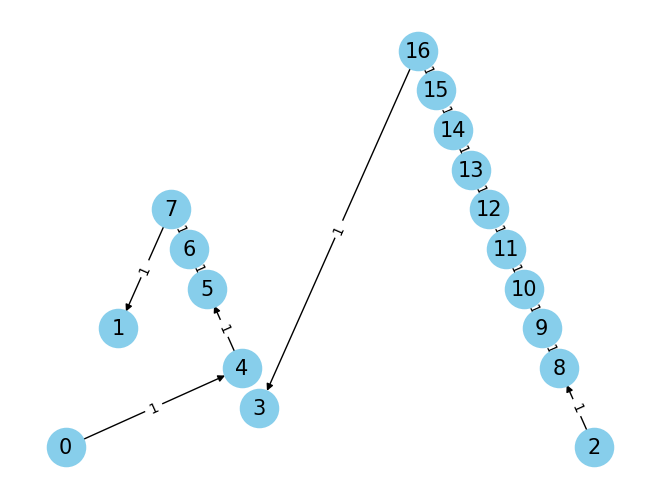

Original graph:
{0: []}


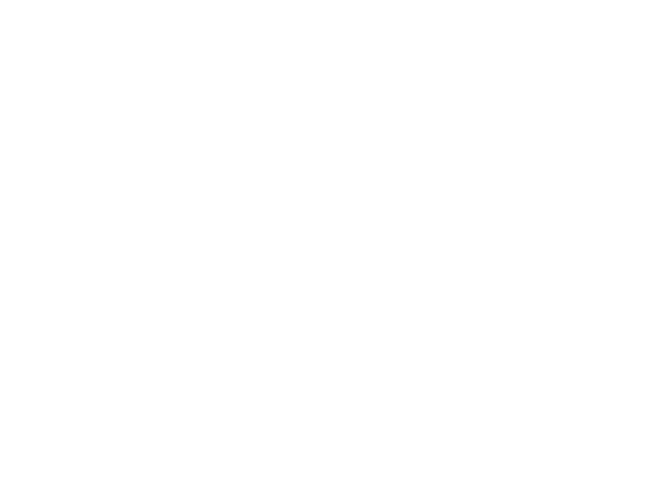

Adjusted graph:
{0: []}


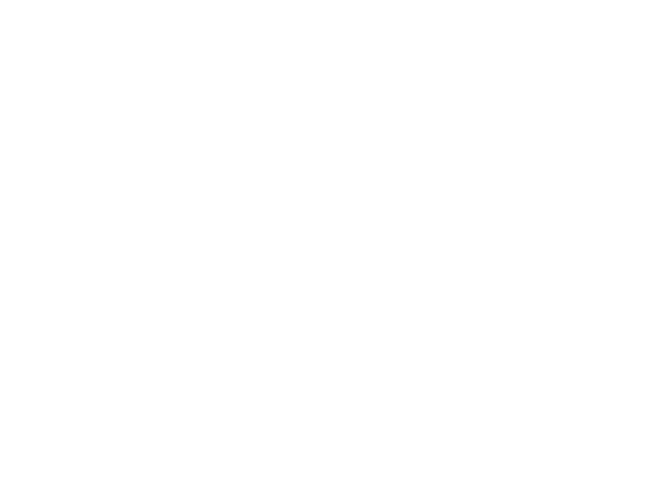

Original graph:
{0: [(1, 4), (2, 3)], 1: [(3, 2)], 2: [(3, 5)], 3: [(4, 1), (5, 2)], 4: [], 5: [(6, 3)], 6: []}


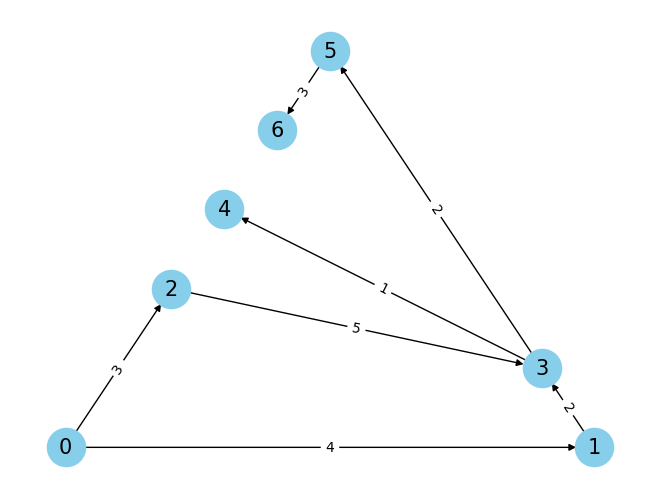

Adjusted graph:
{0: [(7, 1), (10, 1)], 7: [(8, 1)], 8: [(9, 1)], 9: [(1, 1)], 10: [(11, 1)], 11: [(2, 1)], 1: [(12, 1)], 12: [(3, 1)], 2: [(13, 1)], 13: [(14, 1)], 14: [(15, 1)], 15: [(16, 1)], 16: [(3, 1)], 3: [(4, 1), (17, 1)], 17: [(5, 1)], 4: [], 5: [(18, 1)], 18: [(19, 1)], 19: [(6, 1)], 6: []}


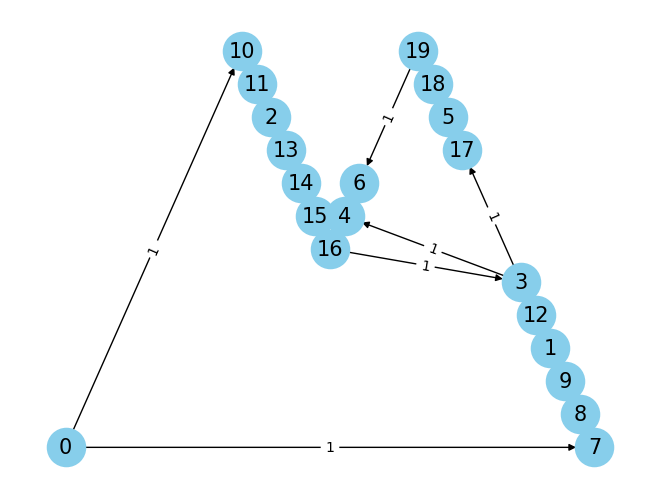

In [10]:
# Test cases
graphs = [
    { # Graph 1
        0: [(1, 2), (2, 3)],
        1: [(3, 6)],
        2: [(3, 7)],
        3: []
    },
    { # Graph 2
        0: [(1, 1)],
        1: [(2, 1)],
        2: [(3, 1)],
        3: [(4, 1)],
        4: []
    },
    { # Graph 3 - Disconnected graph
        0: [(1, 5)],
        1: [],
        2: [(3, 10)],
        3: []
    },
    { # Graph 4 - Single node
        0: []
    },
    { # Graph 5 - Longer and more complex paths
        0: [(1, 4), (2, 3)],
        1: [(3, 2)],
        2: [(3, 5)],
        3: [(4, 1), (5, 2)],
        4: [],
        5: [(6, 3)],
        6: []
    }
]

adjusted_graphs = []
# convert each graph
for graph in graphs:
    print("Original graph:")
    print(graph)
    display_graph(graph)
    
    adjusted_graph = convert_graph(graph)
    print("Adjusted graph:")
    print(adjusted_graph)
    display_graph(adjusted_graph)
    adjusted_graphs.append(adjusted_graph)

In [11]:
adjusted_graphs

[{0: [(4, 1), (5, 1)],
  4: [(1, 1)],
  5: [(6, 1)],
  6: [(2, 1)],
  1: [(7, 1)],
  7: [(8, 1)],
  8: [(9, 1)],
  9: [(10, 1)],
  10: [(11, 1)],
  11: [(3, 1)],
  2: [(12, 1)],
  12: [(13, 1)],
  13: [(14, 1)],
  14: [(15, 1)],
  15: [(16, 1)],
  16: [(17, 1)],
  17: [(3, 1)],
  3: []},
 {0: [(1, 1)], 1: [(2, 1)], 2: [(3, 1)], 3: [(4, 1)], 4: []},
 {0: [(4, 1)],
  4: [(5, 1)],
  5: [(6, 1)],
  6: [(7, 1)],
  7: [(1, 1)],
  1: [],
  2: [(8, 1)],
  8: [(9, 1)],
  9: [(10, 1)],
  10: [(11, 1)],
  11: [(12, 1)],
  12: [(13, 1)],
  13: [(14, 1)],
  14: [(15, 1)],
  15: [(16, 1)],
  16: [(3, 1)],
  3: []},
 {0: []},
 {0: [(7, 1), (10, 1)],
  7: [(8, 1)],
  8: [(9, 1)],
  9: [(1, 1)],
  10: [(11, 1)],
  11: [(2, 1)],
  1: [(12, 1)],
  12: [(3, 1)],
  2: [(13, 1)],
  13: [(14, 1)],
  14: [(15, 1)],
  15: [(16, 1)],
  16: [(3, 1)],
  3: [(4, 1), (17, 1)],
  17: [(5, 1)],
  4: [],
  5: [(18, 1)],
  18: [(19, 1)],
  19: [(6, 1)],
  6: []}]

In [16]:

results = []
for i, adjusted_graph in enumerate(adjusted_graphs):
    result = find_top_k_longest_paths(adjusted_graph, 3)  # Find top 3 longest paths
    results.append((i+1, result))

for result in results:
    for path in result[1]:
        print(f"Graph {result[0]}: Length: {path[0]:2}, Path: {path[1]}")
    print()

Graph 1: Length: 10, Path: [(0, 5), (5, 6), (6, 2), (2, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 3)]
Graph 1: Length:  8, Path: [(0, 4), (4, 1), (1, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 3)]

Graph 2: Length:  4, Path: [(0, 1), (1, 2), (2, 3), (3, 4)]

Graph 3: Length: 10, Path: [(2, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 3)]
Graph 3: Length:  5, Path: [(0, 4), (4, 5), (5, 6), (6, 7), (7, 1)]

Graph 4: Length:  0, Path: []

Graph 5: Length: 13, Path: [(0, 10), (10, 11), (11, 2), (2, 13), (13, 14), (14, 15), (15, 16), (16, 3), (3, 17), (17, 5), (5, 18), (18, 19), (19, 6)]
Graph 5: Length: 11, Path: [(0, 7), (7, 8), (8, 9), (9, 1), (1, 12), (12, 3), (3, 17), (17, 5), (5, 18), (18, 19), (19, 6)]
Graph 5: Length:  9, Path: [(0, 10), (10, 11), (11, 2), (2, 13), (13, 14), (14, 15), (15, 16), (16, 3), (3, 4)]



In [17]:

results = []
for i, graph in enumerate(graphs):
    result = find_top_k_longest_paths(graph, 3)  # Find top 3 longest paths
    results.append((i+1, result))

for result in results:
    for path in result[1]:
        print(f"Graph {result[0]}: Length: {path[0]:2}, Path: {path[1]}")
    print()

Graph 1: Length: 10, Path: [(0, 2), (2, 3)]
Graph 1: Length:  8, Path: [(0, 1), (1, 3)]

Graph 2: Length:  4, Path: [(0, 1), (1, 2), (2, 3), (3, 4)]

Graph 3: Length: 10, Path: [(2, 3)]
Graph 3: Length:  5, Path: [(0, 1)]

Graph 4: Length:  0, Path: []

Graph 5: Length: 13, Path: [(0, 2), (2, 3), (3, 5), (5, 6)]
Graph 5: Length: 11, Path: [(0, 1), (1, 3), (3, 5), (5, 6)]
Graph 5: Length:  9, Path: [(0, 2), (2, 3), (3, 4)]

